In [1]:
%matplotlib inline

import numpy as np

from keras import models
from keras import layers
from sklearn.metrics.pairwise import cosine_similarity

from score import Audio
from utils import FMA, min_max_scaling, TestModel


## Prepairng data

In [2]:
fma = FMA()
tracks = fma.load('data/fma_metadata/tracks.csv')
genres = fma.load('data/fma_metadata/genres.csv')
features = fma.load('data/fma_metadata/features.csv')

In [3]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = fma.train_data('medium')
X_train.shape, X_val.shape, X_test.shape

((19922, 140), (2505, 140), (2573, 140))

## Models

### Model 1
1. Dense 128
2. Dense 64
3. Dense 64
4. Dense 32
5. Dense 20

In [4]:
def model_1():
    input_dim = 140
    encoding_dim = 20
    
    input_layer = layers.Input(shape = (input_dim, ))
    x = layers.Masking(0.)(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
# Model - 2
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
# Model - 3
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


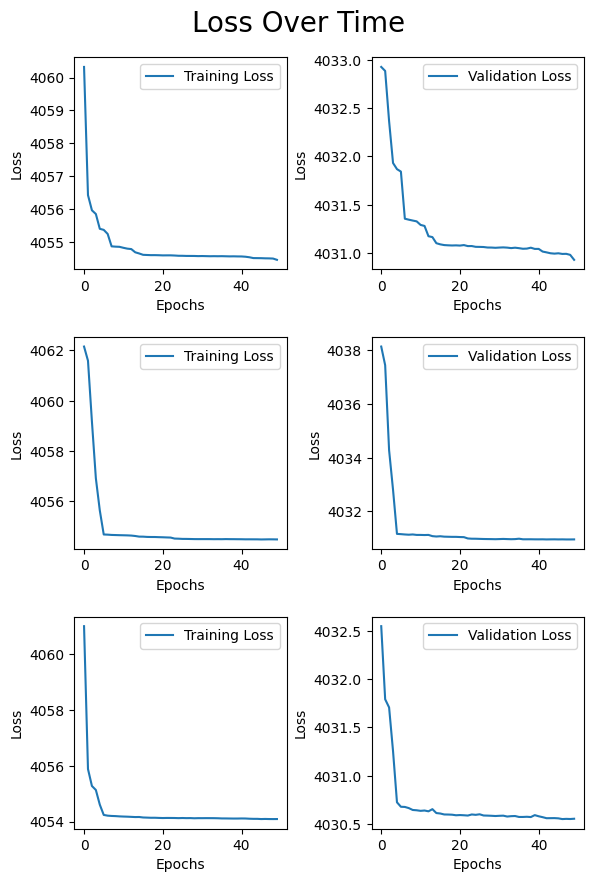

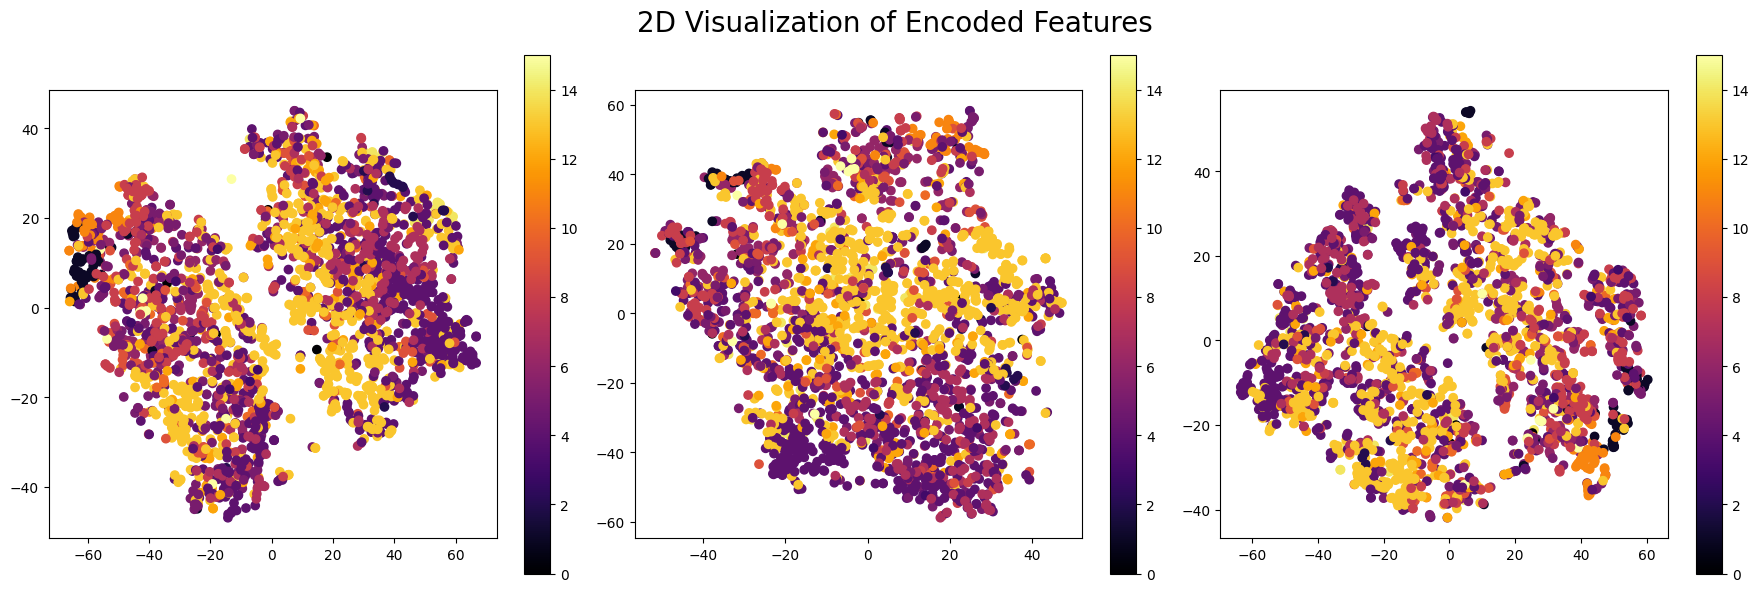

In [8]:
settings = (TestModel.ModelSettings(50, 64), TestModel.ModelSettings(50, 32), TestModel.ModelSettings(50, 16))
tm = TestModel(model_1, settings)
tm.test(X_train, X_train, val = (X_val, X_val), X_test=X_test, Y_test=Y_test)

## Model 2


In [4]:
def model_2():
    input_dim = 140
    encoding_dim = 20
    
    input_layer = layers.Input(shape = (input_dim, ))
    x = layers.Masking(0.)(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
# Model - 2
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
# Model - 3
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


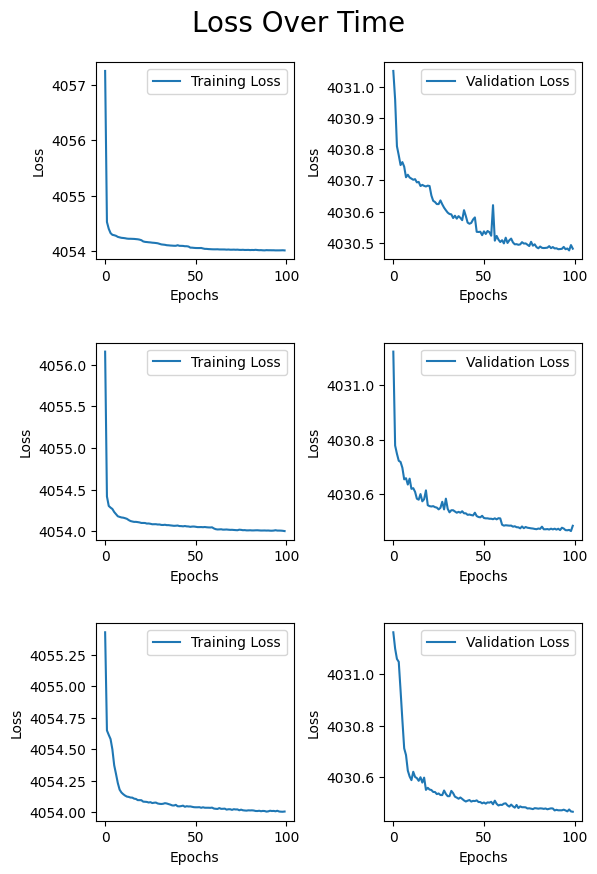

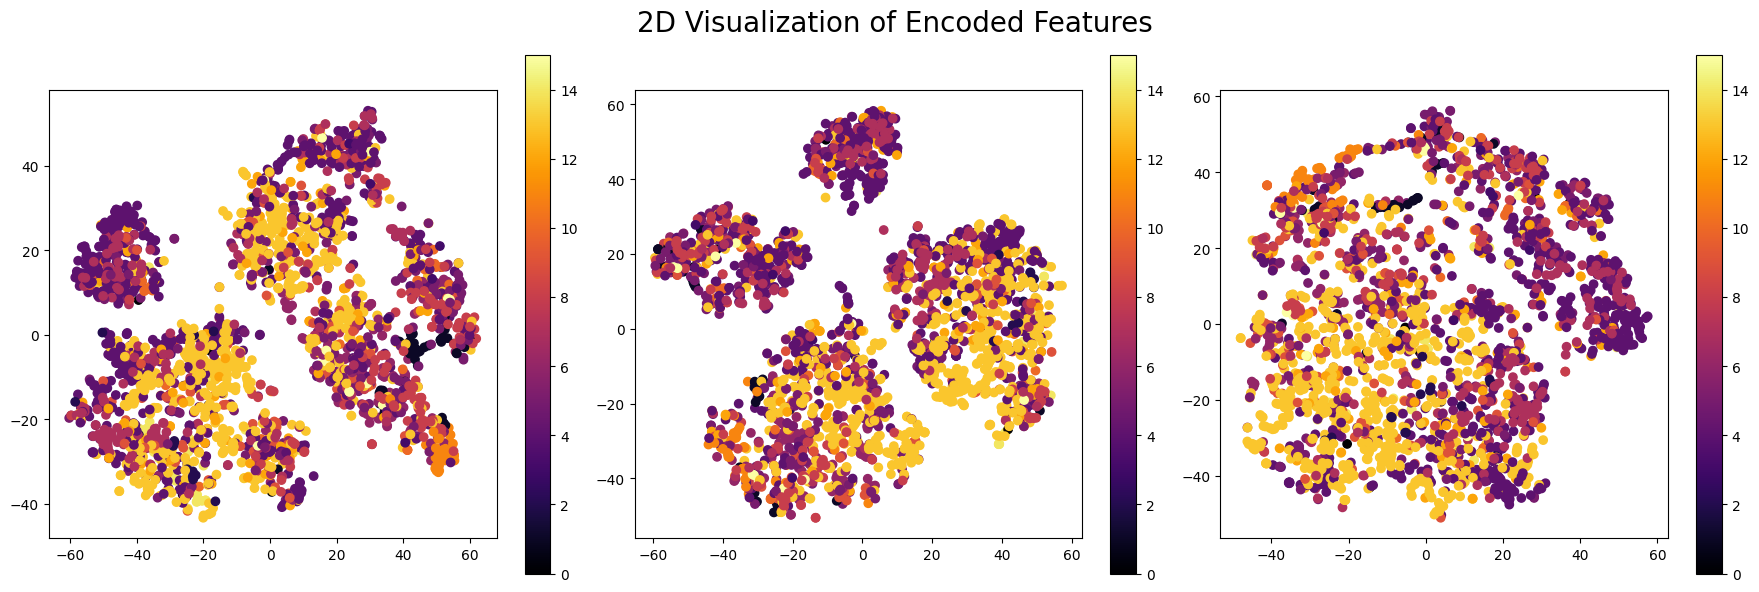

In [9]:
settings = (TestModel.ModelSettings(100, 64), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(100, 16))
tm = TestModel(model_2, settings)
tm.test(X_train, X_train, val = (X_val, X_val), X_test=X_test, Y_test=Y_test)

# Model - 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
# Model - 2
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
# Model - 3
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


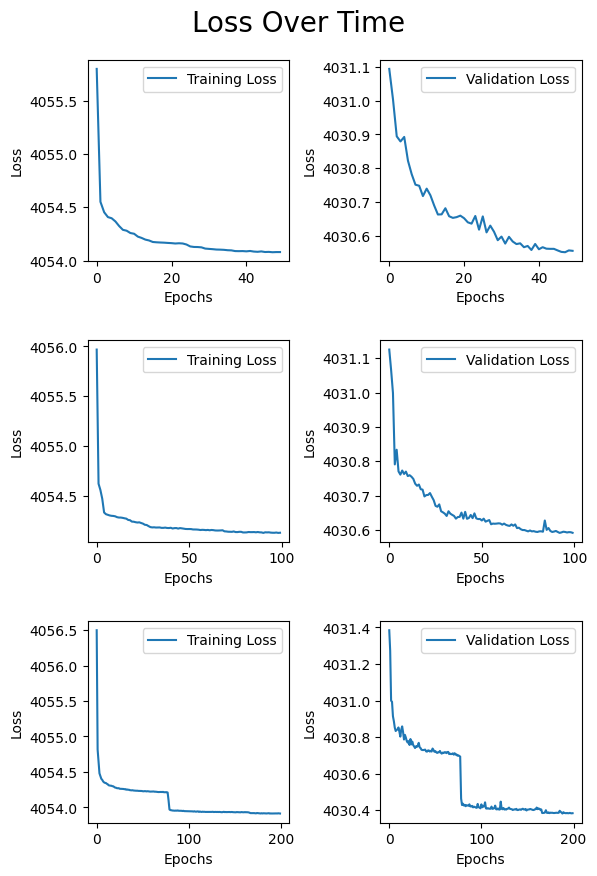

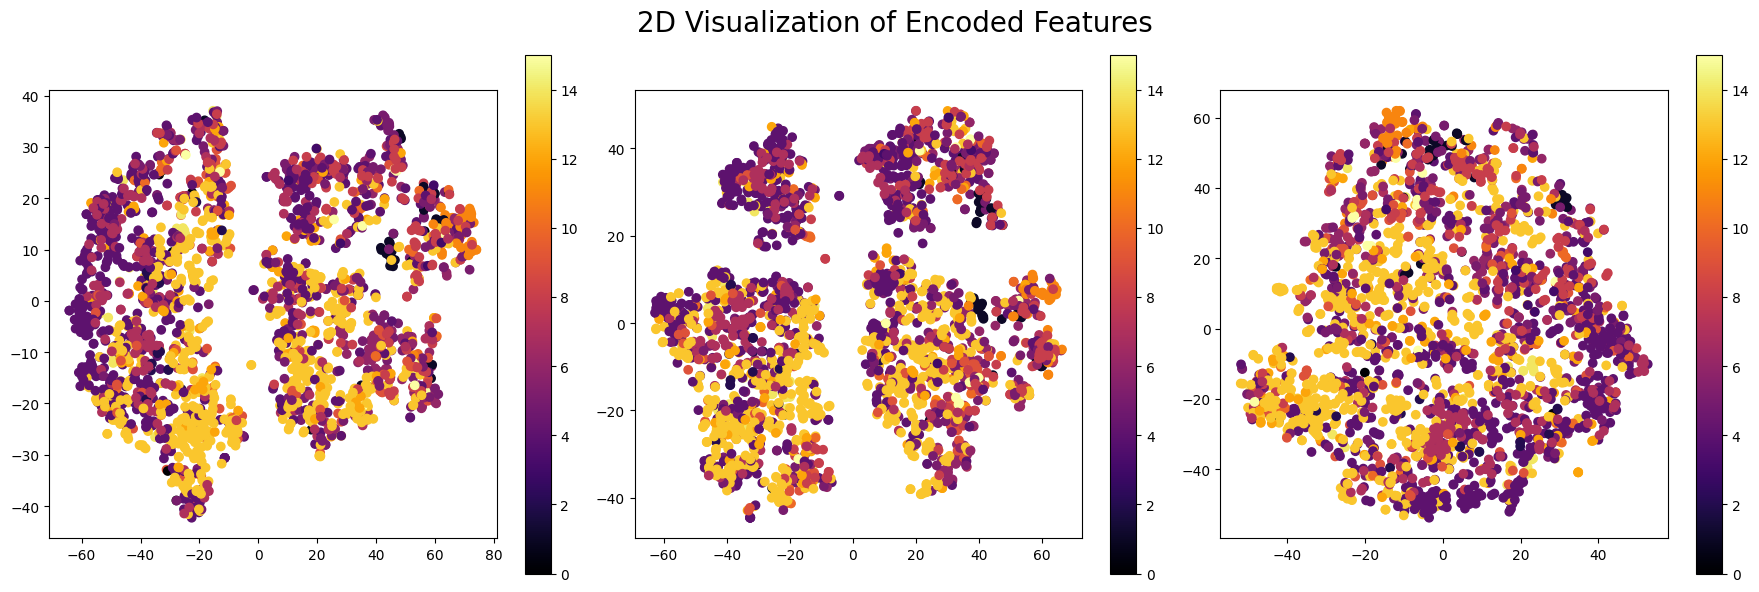

In [10]:
settings = (TestModel.ModelSettings(50, 32), TestModel.ModelSettings(100, 32), TestModel.ModelSettings(200, 32))
tm = TestModel(model_2, settings)
tm.test(X_train, X_train, val = (X_val, X_val), X_test=X_test, Y_test=Y_test)

## Features

In [5]:
def get_features(path: str, encoder: models.Model):
    audio = Audio(path)
    _, _, stats = audio.get_mfcc()
    data = np.array(stats)
    data.shape
    data = data.reshape((1, 140))
    features_reduced = encoder.predict(data)
    features_reduced = features_reduced.flatten()
    features_reduced = min_max_scaling(features_reduced)
    return features_reduced

In [6]:
encoder, autoencoder = model_2()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=100, batch_size=32)

Epoch 1/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4064.0818 - val_loss: 4031.2036
Epoch 2/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 4052.1160 - val_loss: 4031.0051
Epoch 3/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 4068.1804 - val_loss: 4031.0083
Epoch 4/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 4055.6685 - val_loss: 4030.9458
Epoch 5/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 4054.7256 - val_loss: 4030.9617
Epoch 6/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 4049.6316 - val_loss: 4030.9458
Epoch 7/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 4061.4988 - val_loss: 4030.9233
Epoch 8/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 4050.2087 - val_loss: 4030.9126
Epoch 9/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4041.7568 - val_loss: 4030.8743
Epoch 10/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4059.3140 - val_loss: 4030.8379
Epoch 11/100
623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step -

In [27]:
fs = [
    get_features(r"D:\Code\Music_score\src\data\music\download\AUDBVpvGAVs.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\shs0rAiwsGQ.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\H1Dvg2MxQn8.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\pHlqEvAwdVc.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\Z2IHNAjrnNI.mp3", encoder),
    get_features(r"D:\Code\Music_score\src\data\music\download\RhPX1bt0yWw.mp3", encoder)
]
print([i.shape for i in fs])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[(20,), (20,), (20,), (20,), (20,), (20,)]


In [9]:
for i in fs:
    print(i)

[0.39295334 0.17684335 0.24415341 0.         0.51484126 0.95676315
 1.         0.59111273 0.4441061  0.4688017  0.5163004  0.6728888
 0.24098465 0.68522245 0.05296485 0.23498297 0.5851336  0.
 0.5056204  0.8342198 ]
[0.4916426  0.1403219  0.23286697 0.07188983 0.6232681  0.71738243
 0.9992075  0.82649297 0.5896024  0.31800768 0.48270303 0.63547856
 0.28913656 0.6470572  0.173778   0.19957088 1.         0.
 0.5973538  0.7477871 ]
[0.33403662 0.1219641  0.2752592  0.         0.5075668  0.8706188
 1.         0.68427944 0.6994863  0.40413213 0.38470638 0.78277355
 0.23006275 0.798587   0.04792685 0.08304331 0.9175946  0.
 0.46016222 0.9289912 ]


In [28]:
res = cosine_similarity(fs)
print(np.round(res, 4)*100)

for i, feature in enumerate(res):
    res[i][i] = 0
    print(f"{i} -> {np.where(res[i] == max(res[i]))[0]}")
    res[i][i] = 100

[[100.        98.85      96.93      98.03      99.56      99.44    ]
 [ 98.85     100.        92.74      94.69      99.74      97.119995]
 [ 96.93      92.74     100.        98.09      94.85      98.58    ]
 [ 98.03      94.69      98.09     100.        96.130005  98.49    ]
 [ 99.56      99.74      94.85      96.130005 100.        98.38    ]
 [ 99.44      97.119995  98.58      98.49      98.38     100.      ]]
0 -> [4]
1 -> [4]
2 -> [5]
3 -> [5]
4 -> [1]
5 -> [0]
